# Fetch tweets of TESLA during trading time

In [1]:
#import libary
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from time import sleep
import time
import datetime
access_token = "4251754339-AzSMlK4YyWPaI4tZMX1HdBlm9ulmRiCftJrus0k"
access_token_secret = "uVLcu6gjpQr2FUZBbh3zlKJ9uEaALkfOQO7OnHjnBdc2R"
consumer_key = "jlqWQHn1vVNHefOjQ8zMj4ZPf"
consumer_secret ="Gc1Wc8SzfsJoD5n6RwNlFRcZxm2Uv3JspDL6qfsqsviqSfUR7V"

#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):
    def __init__ (self, time_limit):  #put whatever number (in second) to control the collecting time
        #creat a timer
        self.start_time=time.time()
        self.limit=time_limit
        self.tweet_data=[]

    def on_data(self, data):
        while(time.time()-self.start_time) <= self.limit:
            print data
            savefile= open ("tweets_during_trading.json",'a')
            #only write the tweets during trading time into the file.
            now = datetime.datetime.now()
            today930am = now.replace(hour=9, minute=30, second=0, microsecond=0)
            today400pm = now.replace(hour=16, minute=0, second=0, microsecond=0)
            if now >today930am and now < today400pm:
                savefile.write(data)
                savefile.write("\n")
            savefile.close()
            return True
        print("Finished")
        exit()

    def on_error(self, status):
        print status

#This handles Twitter authetification and the connection to Twitter Streaming API
l = StdOutListener(172800)
auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret)
stream = Stream(auth, l)

#This line filter Twitter Streams to capture data by the keywords.
stream.filter(track=["Tesla"])

KeyboardInterrupt: 

# Fetch Stock Prices

In [ ]:
import urllib2
import json
import time
import datetime
class GoogleFinanceAPI:
    def __init__(self):
        self.prefix = "http://finance.google.com/finance/info?client=ig&q="
    def get(self,symbol,exchange):
        url = self.prefix+"%s:%s"%(exchange,symbol)
        u = urllib2.urlopen(url)
        content = u.read()
        obj = json.loads(content[3:])
        return obj[0]
    
c = GoogleFinanceAPI()
file = open("realtime_google.json","a")
while 1:  #set time interval
    quote = c.get("TSLA","NASDAQ")
    now = datetime.datetime.now()
    today930am = now.replace(hour=9, minute=30, second=0, microsecond=0)
    today400pm = now.replace(hour=16, minute=0, second=0, microsecond=0)
    print quote
    if now >today930am and now < today400pm:
        file.write(quote)
        file.write("\n")
    time.sleep(5)  #every 5 seconds

# Import json files into Mongodb

In [ ]:
#We used Mongodb shell to do this step

# Language Frequency Analysis

               Count
User_Language       
zh-cn              1
ca                 1
xx-lc              1
th                 1
zh-CN              1
es-MX              1
ar                 2
cs                 2
da                 2
en-GB              3
uk                 3
el                 3
sv                 3
sr                 3
pl                 3
no                 4
hu                 5
fi                 5
it                19
nl                35
en-gb             35
id                46
tr                55
ru                66
ja                83
de                85
pt                95
fr               109
es               207
en              1865


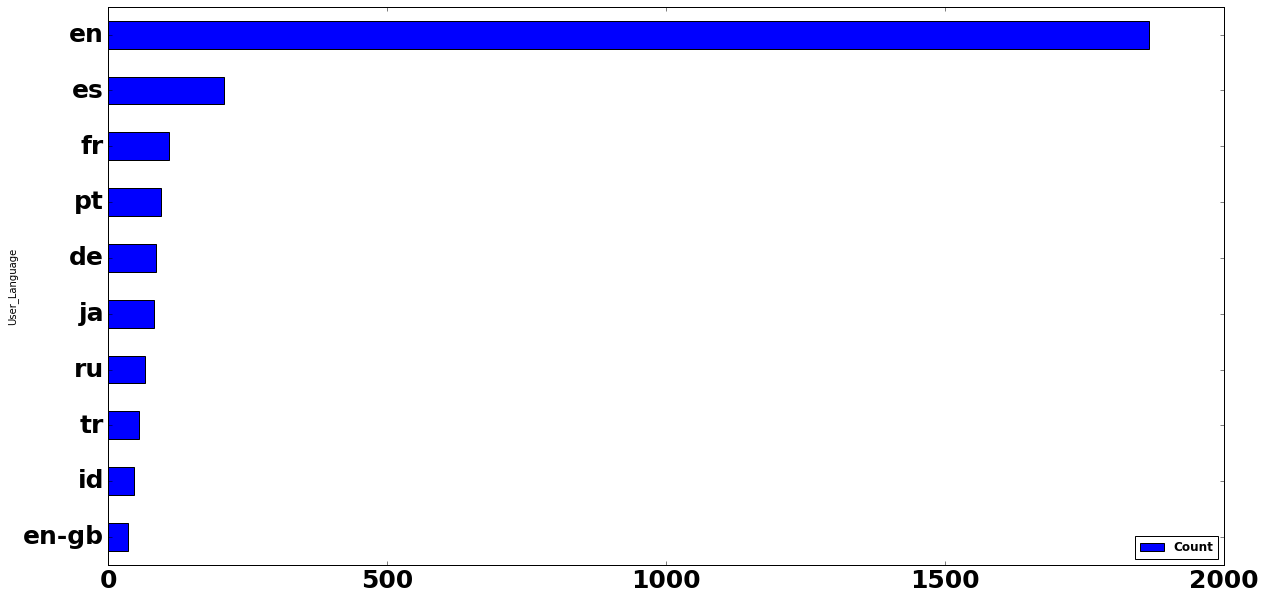

In [66]:
#Languages of Users
%matplotlib inline 
from pymongo import MongoClient
import matplotlib as plt
import pandas as pd
from matplotlib.pyplot import hist
import numpy as np
{'el': 'Greek', 'en': 'English', 'zh': 'Chinese', 'vi': 'Vietnamese',
 'is': 'Icelandic', 'it': 'Italian', 'iw': 'Hebrew', 'ar': 'Arabic', 
 'in': 'Indonesian', 'et': 'Estonian', 'es': 'Spanish', 'ru': 'Russian', 
 'nl': 'Dutch', 'pt': 'Portuguese', 'no': 'Norwegian', 'tr': 'Turkish', 
 'ne': 'Nepali', 'lv': 'Latvian', 'lt': 'Lithuanian', 'th': 'Thai', 'ro': 'Romania', 
 'pl': 'Polish', 'fr': 'French', 'bg': 'Bulgarian', 'hr': 'Croatian', 
 'de': 'German', 'da': 'Danish', 'bs': 'Bosnian', 'fi': 'Finnish', 'hu': 'Hungarian', 
 'ja': 'Japanese', 'tl': 'tagalog', 'sr': 'Serbian', 'ko': 'Korean', 'sv': 'Swedish', 
 'sk': 'Slovak', 'und': 'Undetermined', 'uk': 'Ukrainian', 'sl': 'Slovenian', 'mr': 'Marathi'}
client = MongoClient()
db = client.final
cursor = db.tweets02.aggregate([{"$group": {"_id": "$user.lang","count": {"$sum":1}}}])

lang_data = pd.DataFrame(list(cursor))
lang_data.columns= ['User_Language', 'Count']
lang_data=(lang_data.groupby('User_Language').sum())
lang_data=lang_data.sort_values(by = 'Count', ascending = True)
print lang_data

lang_data[-10:].plot(kind = 'barh',fontsize = 25, figsize =(20,10))

                Count
Tweet_Language       
zh                  1
bg                  1
cy                  1
ko                  1
hi                  1
uk                  2
sv                  2
da                  3
el                  3
ro                  3
lv                  3
hu                  3
ar                  4
fi                  4
cs                  5
th                  5
et                  7
tl                  9
no                 13
ht                 15
it                 21
eu                 26
nl                 27
ru                 31
tr                 65
de                 75
ja                 82
in                 97
pl                 99
fr                110
pt                111
es                210
en               1572


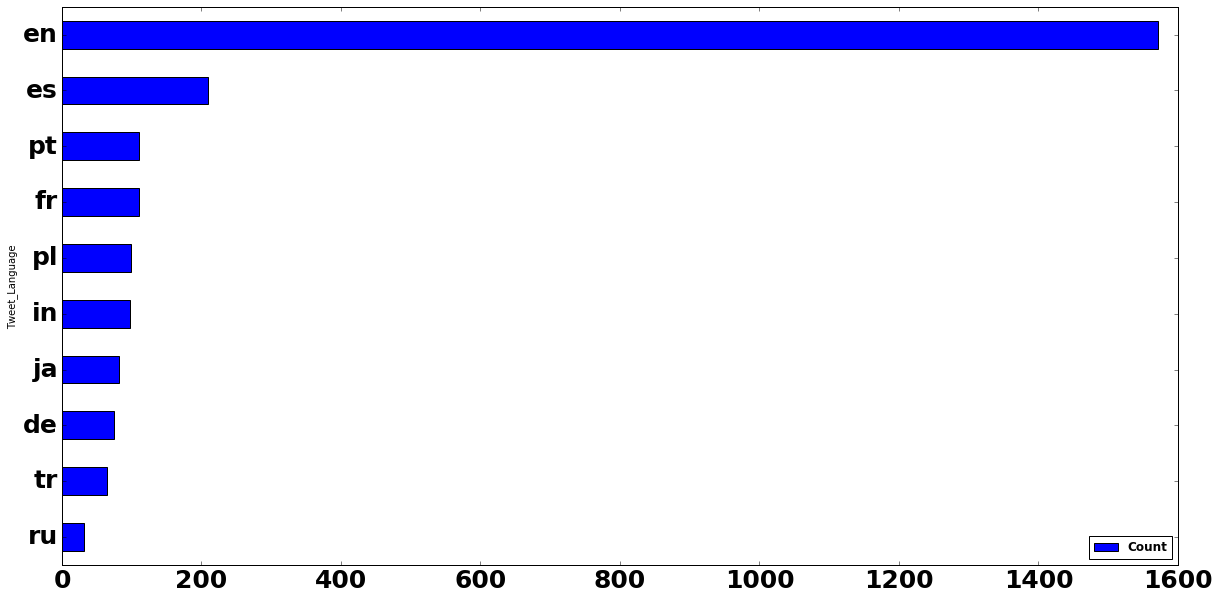

In [67]:
#Languages of Tweets
from pymongo import MongoClient
import matplotlib as plt
client = MongoClient()
db = client.final
cursor = db.tweets02.aggregate([{"$group": {"_id": "$lang","count": {"$sum":1}}}])
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import numpy as np
lang_data = pd.DataFrame(list(cursor))
lang_data.columns= ['Tweet_Language', 'Count']
lang_data=(lang_data.groupby('Tweet_Language').sum())
lang_data=lang_data.sort_values(by = 'Count', ascending = True)
lang_data = lang_data.drop(["und"])
print lang_data
lang_data[-10:].plot(kind = "barh", fontsize = 25, figsize =(20,10))

# Time Zone Analysis

{'Central Time (US & Canada)': 123, 'Prague': 220, 'London': 60, 'Eastern Time (US & Canada)': 245, 'Pacific Time (US & Canada)': 297}


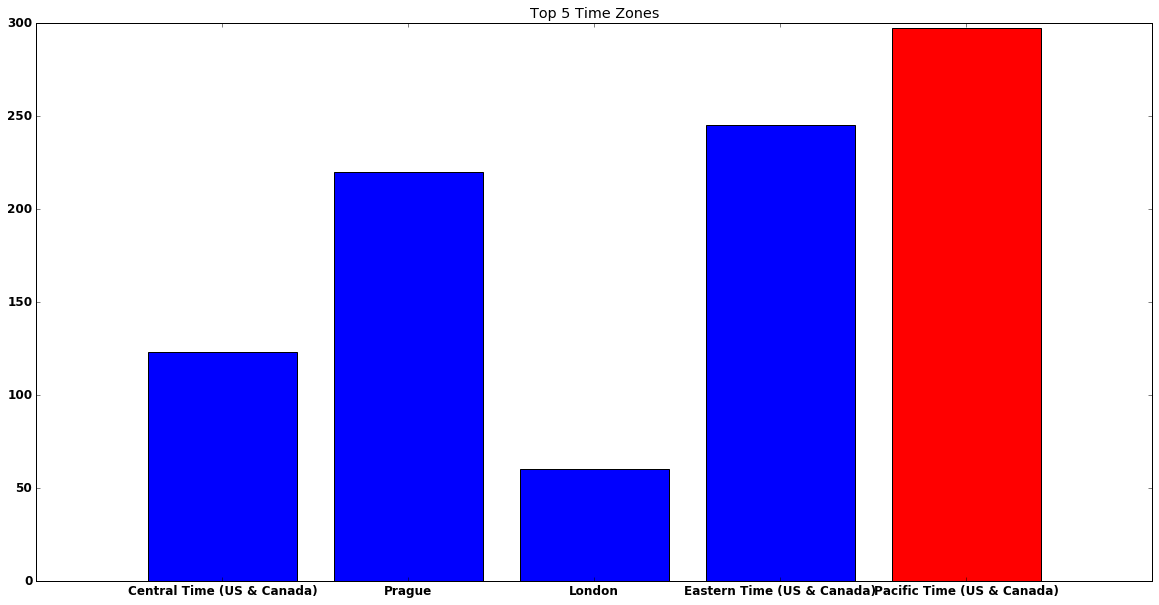

In [68]:
%matplotlib inline
import matplotlib
from pymongo import MongoClient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#access mongodb
client = MongoClient()
db = client.final
cursor = db.tweets02.aggregate([{"$group": {"_id": "$user.time_zone","count": {"$sum":1}}}])
#put timezone value into dataframe
data = pd.DataFrame(list(cursor))
array1 = np.array(data)
array1 = array1[array1[:,1].argsort()]
array1 = np.fliplr(array1)
#above clean ndarray

#get top 5 time zones which discuss tesla most
counts = list((array1[:,0]))[-6:-1] #Here drop the useless value: None
time_zone = list((array1[:,1]))[-6:-1] #Here drop the useless value: None

#convert time zone from unicode to string
time_zone = map(str, time_zone)
dict1 = dict(zip(time_zone, counts))
print dict1
#plot data using plt
plt.figure(figsize=(20,10))
colors = ['b','b','b','b','r']
plt.bar(range(len(dict1)), dict1.values(),color=colors, align='center')
#plt.xticks(range(5),('CT(USA)','Prague','London', \
#                    'ET(USA)','PT(USA)'))
plt.xticks(range(5),dict1.keys())
plt.title("Top 5 Time Zones")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
plt.show()

# Regression Analysis

In [69]:
#import libraries
%matplotlib inline
import ast
import re
import numpy as np
import  scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import  math
import json
import csv

In [70]:
#Get number of counts in one minute
file = open("tweetcount_Dec2.json","r")
num_lines = sum(1 for line in open('tweetcount_Dec2.json'))
counts = []
for i in range(num_lines):
    content = file.readline()
    content = ast.literal_eval(content)
    count = content["count"]
    counts.append(int(count))
print counts

[6, 8, 7, 5, 8, 4, 6, 8, 7, 5, 7, 7, 5, 21, 6, 17, 11, 12, 5, 11, 9, 6, 3, 10, 2, 11, 1, 5, 25, 6, 7, 9, 10, 4, 8, 11, 13, 8, 4, 17, 5, 6, 10, 15, 13, 8, 16, 13, 5, 10, 4, 4, 7, 10, 9, 13, 5, 2, 7, 8, 14, 7, 8, 10, 4, 6, 10, 3, 11, 2, 7, 5, 8, 7, 10, 9, 8, 11, 8, 7, 6, 9, 3, 12, 9, 8, 5, 7, 13, 7, 9, 4, 7, 7, 9, 4, 3, 5, 11, 14, 3, 5, 7, 14, 19, 8, 4, 2, 4, 9, 7, 2, 5, 4, 4, 7, 3, 2, 14, 8, 9, 7, 7, 8, 4, 6, 2, 6, 9, 10, 2, 11, 6, 7, 21, 10, 4, 1, 5, 10, 6, 6, 4, 8, 4, 4, 4, 4, 12, 18, 11, 7, 5, 14, 7, 2, 15, 13, 5, 3, 4, 8, 3, 1, 26, 4, 2, 6, 6, 3, 9, 5, 42, 10, 4, 3, 5, 4, 9, 31, 10, 10, 5, 10, 5, 8, 10, 5, 5, 5, 4, 7, 7, 5, 5, 7, 8, 6, 7, 6, 12, 1, 4, 8, 10, 36, 7, 3, 7, 4, 5, 8, 4, 5, 4, 5, 11, 6, 5, 6, 7, 2, 6, 5, 13, 21, 2, 4, 15, 3, 4, 5, 7, 12, 9, 6, 2, 12, 12, 12, 7, 4, 6, 7, 9, 16, 9, 15, 8, 16, 12, 6, 13, 7, 8, 5, 6, 8, 6, 4, 10, 9, 3, 4, 5, 8, 14, 10, 4, 13, 11, 11, 11, 13, 7, 6, 6, 9, 4, 6, 7, 8, 10, 7, 14, 12, 10, 6, 9, 8, 17, 7, 9, 15, 11, 11, 10, 14, 10, 24, 21, 13, 8, 

In [71]:
#Get all the prices
file = open("realtime_stockprice_Dec2.json","r")
num_lines = sum(1 for line in open('realtime_stockprice_Dec2.json'))
prices = []
times = []
for i in range(num_lines):
    line1 = file.readline()
    line1 = ast.literal_eval(line1) #dictionary
    price = line1["l_cur"] #get current price
    time = line1["lt_dts"]
    time = re.sub("[^0-9]", "", time)
    time = time[4:-2]
    times.append(time)
    prices.append(price)
prices = [eval(x.encode('UTF8')) for x in prices]
times = [x.encode('UTF8') for x in times]

In [72]:
#Get average prices in 1 minute
subPrices = [prices[n:n+11] for n in range(0, len(prices), 11)]
# print len(subPrices)
avePrices = []
for i in range(len(subPrices)):
    avePrice = sum(subPrices[i])/11.64
    avePrice = '%.2f' %avePrice
    avePrices.append(eval(avePrice))
avePrices = avePrices[:-14]
print avePrices

[223.61, 224.19, 224.73, 224.63, 224.4, 224.58, 224.61, 224.59, 225.16, 225.05, 225.04, 224.77, 223.96, 223.6, 223.64, 223.97, 224.51, 224.51, 224.25, 224.11, 224.17, 224.22, 223.86, 223.82, 223.68, 223.94, 224.1, 224.18, 224.26, 224.66, 224.78, 224.79, 224.94, 224.8, 224.74, 224.82, 224.75, 224.63, 224.59, 224.57, 224.44, 224.19, 224.15, 224.07, 223.86, 223.92, 223.89, 223.8, 223.86, 223.88, 223.78, 223.77, 223.67, 223.23, 222.98, 223.31, 223.24, 223.08, 223.12, 223.08, 223.16, 223.15, 223.25, 223.09, 223.29, 223.35, 223.26, 223.44, 223.64, 223.62, 223.4, 223.22, 223.26, 223.49, 223.72, 223.48, 223.61, 223.75, 223.81, 223.83, 223.87, 224.05, 224.04, 224.11, 224.0, 223.96, 223.97, 224.08, 224.39, 224.37, 223.96, 223.74, 223.37, 223.31, 223.26, 223.25, 223.33, 223.23, 223.23, 223.25, 223.33, 223.44, 223.48, 223.56, 223.42, 223.45, 223.34, 223.29, 223.08, 222.79, 222.61, 222.33, 222.45, 222.39, 222.36, 222.27, 222.34, 222.46, 222.33, 222.25, 222.21, 222.13, 222.17, 222.2, 222.31, 222.31,

In [73]:
# Write counts and prices into CSV file

rows = zip(counts[:300],avePrices[:300])
with open('Regression.csv', 'wb') as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
f.close()

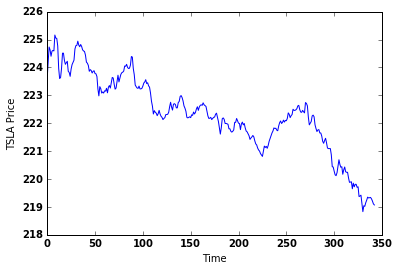

In [74]:
#convert prices to numpy array and plot
prices = np.array(avePrices)
plt.plot(prices, 'b-')
plt.ylabel("TSLA Price")
plt.xlabel("Time")
plt.show()

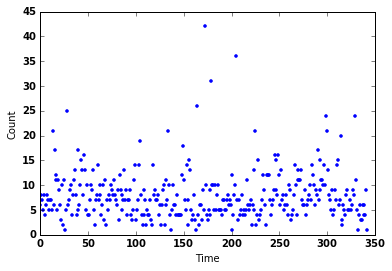

In [76]:
#convert counts to numpy array and plot
counts = np.array(counts)
plt.plot(counts, 'b.')
plt.ylabel("Count")
plt.xlabel("Time")

In [78]:
#get intercept and slope of linear function
x = counts
y = avePrices
p1 = np.polyfit(x, y, 1)
print p1


[  5.17571885e-03   2.22295096e+02]


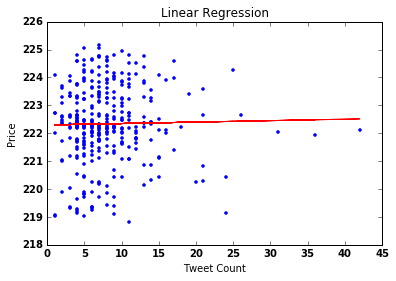

In [82]:
#plot
plot(x,y,".")
plot(x, np.polyval(p1,x),'r-')
plt.xlabel("Tweet Count")
plt.ylabel("Price")
plt.title("Linear Regression")
show()

In [29]:
from scipy.stats import  *
slope,intercept,r_value,p_value,std_err = linregress(x,y)
print "slope", slope
print "intercept", intercept
print "std_err", std_err
print "pvalue", p_value
print "rvalue", r_value

slope 0.00517571884984
intercept 222.295095707
std_err 0.0148693166787
pvalue 0.72799452224
rvalue 0.01884626685


In [30]:
#Print regression line
print "The Regression line is, Y= ", intercept, "+", slope, "*X"

The Regression line is, Y=  222.295095707 + 0.00517571884984 *X


# Tweets Sentiment Analysis

# 0.Import modules

In [48]:
#connect to mongodb
from pymongo import MongoClient

from collections import Counter, defaultdict
# Import numpy and scipy packages to do scientific analysis
import numpy as np
import scipy as sp
import scipy.stats
# Import NLTK package
from nltk import sent_tokenize,word_tokenize,porter
from nltk import PorterStemmer
from nltk.corpus import stopwords
# Import chain package to do iteration 
from itertools import chain
# Import operator package to sort a dictionary by its values
import operator
# Import re package to implement regular expression
import re
# Import timer
import time
# Import topic model packages
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import ldamodel;
from gensim import matutils;

# 1. put contents of tweets into a list

In [45]:
client = MongoClient()
db = client.final
#create an empty list
tweets = []
cursor = db.tweets02.find({},{"text":1, "_id": 0})
for document in cursor:
    tweets.append(document["text"])
    #print (document["text"])
tweets = [x.encode('UTF8') for x in tweets]
print tweets

['Tesla bug\xc3\xbcn 8 ayl\xc4\xb1k oldu. \xc4\xb0yi ki do\xc4\x9furmu\xc5\x9fum &lt;3 &lt;3 \xf0\x9f\x90\xbe', '#telmi #dewa Tesla S P85D an der Ampel: Viele Sportwagen sehen alt aus!', 'TSLA Price Update: $237.00 #Tesla via @Flutter_HQ source https://t.co/btWZ5OCjyL', 'Tesla S P85D an der Ampel: Viele Sportwagen sehen alt\xc2\xa0aus! https://t.co/FZ4750b2id https://t.co/6B8GSFWaRn', 'Tesla \xd0\xbd\xd0\xb0\xd0\xbd\xd0\xb8\xd0\xbc\xd0\xb0\xd0\xb5\xd1\x82 \xd0\xb3\xd0\xbb\xd0\xb0\xd0\xb2\xd0\xbd\xd0\xbe\xd0\xb3\xd0\xbe \xd0\xb0\xd1\x80\xd1\x85\xd0\xb8\xd1\x82\xd0\xb5\xd0\xba\xd1\x82\xd0\xbe\xd1\x80\xd0\xb0 \xd1\x84\xd0\xb8\xd1\x80\xd0\xbc\xd0\xb5\xd0\xbd\xd0\xbd\xd1\x8b\xd1\x85 \xd0\xbc\xd0\xb0\xd0\xb3\xd0\xb0\xd0\xb7\xd0\xb8\xd0\xbd\xd0\xbe\xd0\xb2 Apple\n\n#Tesla@viakovtrade #tsla #forecast_Tesla\n\n\xd0\x9a\xd0\xbe\xd0\xbc\xd0\xbf\xd0\xb0\xd0\xbd\xd0\xb8\xd1\x8f Te https://t.co/PfSIacBKK3', 'RT @kirillklip: #Lithium Technology: Brilliant Minds #technology #capital together #SiliconV

In [46]:
# Word frequency calculation function
def getWordCounts(texts,word_proc = lambda x : x): # lambda function
    word_counts = Counter()
    for text in texts:
        for sent in sent_tokenize(text.decode('ISO-8859-1')):
            for word in word_tokenize(sent):
                word_counts[word_proc(word)] += 1
    return word_counts

In [49]:
vocabulary=getWordCounts(tweets,lambda x: x.lower())

# 2.Import positive and negative words from General Inquirer

In [50]:
# Import csv package to convert pandas dataframe to csv file
import csv
# Import positive and negative words from General Inquirer
positive=[]
negative=[]
keys_to_ignore = ['Entry','Source','Defined']
with open('general_inquirer_dict.txt') as fin:
    reader = csv.DictReader(fin,delimiter='\t')
    for i,line in enumerate(reader):
        if line['Negativ']=='Negativ':
            if line['Entry'].find('#')==-1:
                negative.append(line['Entry'].lower())
            if line['Entry'].find('#')!=-1: #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
                negative.append(line['Entry'].lower()[:line['Entry'].index('#')]) 
        if line['Positiv']=='Positiv':
            if line['Entry'].find('#')==-1:
                positive.append(line['Entry'].lower())
            if line['Entry'].find('#')!=-1: #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
                positive.append(line['Entry'].lower()[:line['Entry'].index('#')])

pvocabulary=sorted(list(set(positive))) #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
nvocabulary=sorted(list(set(negative))) #In General Inquirer, some words have multiple senses. Combine all tags for all senses.

# 3.Count positive and negative word frequency in all tweets which contain Tesla as their key word

In [51]:
pndict=dict()
pndict['Positive']=Counter()
pndict['Negative']=Counter()
for pword in pvocabulary:
        for ptext in vocabulary:
            if pword==ptext:
                pndict['Positive'][pword]=vocabulary[pword]
for nword in nvocabulary:
        for ntext in vocabulary:
            if nword==ntext:
                pndict['Negative'][nword]=vocabulary[nword]

In [63]:
positive100 = sorted( pndict['Positive'].items(), key=operator.itemgetter(1), reverse=True)[:100]
negative100 = sorted( pndict['Negative'].items(), key=operator.itemgetter(1), reverse=True)[:100]
positivesum=0
negativesum=0
for i in range(100):
    positivesum += positive100[i][1]
    negativesum += negative100[i][1]

In [64]:
print "Positive-negative words ratio =", 1.0*positivesum/negativesum

Positive-negative words ratio = 1.41396103896
